<a href="https://colab.research.google.com/github/DanielFMiller/AlgoRiskMgmt/blob/master/O'Reilly_Class_Algorithmic_Risk_Management_VaR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [0]:
import scipy.stats as scs
import numpy as np
import numpy.random as npr
import pandas_datareader.data as pdr
import fix_yahoo_finance as yf
yf.pdr_override()
import matplotlib.pyplot as plt
plt.style.use('seaborn')
from datetime import datetime

In [0]:
start = datetime(2017, 7, 16)
end = datetime(2019, 8, 22)

market = pdr.get_data_yahoo('SPY', start, end)
stock = pdr.get_data_yahoo('AAPL', start, end)

stock_returns = stock['Adj Close'].pct_change(1)
stock_returns = stock_returns.dropna()


[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded


# Parametric Value at Risk (VaR)

In [0]:
mu = stock_returns.mean()
sigma = stock_returns.std()
confidence = 99
zscore = scs.norm.ppf(confidence/100)
shares = 100
value = shares * stock['Adj Close'][-1]
days = 5
nday_return = (mu + 1)**days - 1
nday_volatility = sigma * np.sqrt(days)
parametric_var = nday_return*value - (zscore * nday_volatility * value)
print("The {0} day Parametric VaR at {1}% confidence level is ${2}".format(days, confidence, round(parametric_var, 2)))
print("Currently, the value of your stock is ${0} with a {1} day expected return of ${2}".format(round(value, 2), days, round(nday_return*value)))

The 5 day Parametric VaR at 99% confidence level is $-1781.91
Currently, the value of your stock is $21264.0 with a 5 day expected return of $93.0


# Non-parametric VaR

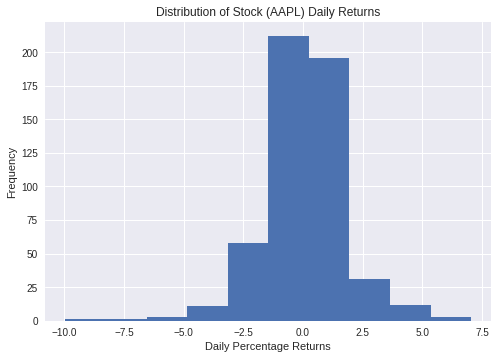

Descriptive stastics of Apple stock's percentage returns:
count    528.000000
mean       0.000876
std        0.016953
min       -0.099607
25%       -0.006677
50%        0.000782
75%        0.009666
max        0.070421
Name: Adj Close, dtype: float64


In [0]:
plt.hist(stock_returns*100), plt.title('Distribution of Stock (AAPL) Daily Returns'), plt.xlabel('Daily Percentage Returns'), plt.ylabel('Frequency'), plt.show()
print("Descriptive stastics of Apple stock's percentage returns:\n{}".format(stock_returns.describe()))

In [0]:
sorted_returns = stock_returns.sort_values()
sorted_returns.head(6)


Date
2019-01-03   -0.099607
2018-11-02   -0.066331
2019-05-13   -0.058119
2019-08-05   -0.052348
2018-11-12   -0.050374
2018-11-20   -0.047778
Name: Adj Close, dtype: float64

In [0]:
confidence = 99
percentile = 100 - confidence
frequency = int(sorted_returns.count()*percentile/100)
var = scs.scoreatpercentile(sorted_returns, percentile)
nonparametric_var = var*value
expected_shortfall = sorted_returns[:frequency].mean()
print("The daily Non-parmeteric VaR at {0}% confidence level is {1}% implying a dollar loss of ${2} based on the current value of ${3}".format(confidence, round(var*100,2), round(nonparametric_var, 2), round(value, 2)))
print("The Expected Shortfall is {0}% with a dollar loss of ${1}".format(round(expected_shortfall*100,2), round(expected_shortfall*value)))

The daily Non-parmeteric VaR at 99% confidence level is -4.74% implying a dollar loss of $-1007.61 based on the current value of $21264.0
The Expected Shortfall is -6.54% with a dollar loss of $-1390.0


# Monte Carlo VaR

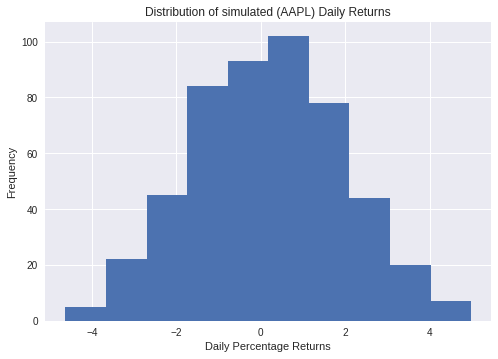

In [0]:
npr.seed(101)
sample = 500
simulated_returns = npr.normal(mu, sigma, sample)
plt.hist(simulated_returns*100), plt.title('Distribution of simulated (AAPL) Daily Returns'), plt.xlabel('Daily Percentage Returns'), plt.ylabel('Frequency'), plt.show();

In [0]:
sorted_simulated_returns = np.sort(simulated_returns)
confidence = 99
percentile = 100-confidence
var = scs.scoreatpercentile(sorted_simulated_returns, percentile)
nonparametric_var = var*value
print("The daily Non-parmeteric VaR at {0}% confidence level is {1}% implying a dollar loss of ${2} based on the current value of ${3}".format(confidence, round(var*100,2), round(nonparametric_var, 2), round(value, 2)))

The daily Non-parmeteric VaR at 99% confidence level is -3.66% implying a dollar loss of $-778.01 based on the current value of $21264.0
